In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import levene

## Question 1
#### letter d)

In [10]:

df = pd.read_excel('wage.xlsx')
df['lwage'] = np.log(df['wage'])
df = df[['lwage','male']]
df

FileNotFoundError: ignored

In [ ]:

y_m = df[df['male'] == 1]['lwage']
y_f = df[df['male'] == 0]['lwage']
n_m = len(y_m)
n_f = len(y_f)
mean_m = np.mean(y_m)
mean_f = np.mean(y_f)
s_m = np.var(y_m)
s_f = np.var(y_f)

T = np.sqrt((n_m*n_f)/(n_m+n_f))*(np.log(s_f) - np.log(s_m))

k_hat = ((n_m+n_f)*(np.sum((y_f-mean_f)**4) + np.sum((y_m-mean_m)**4)))/((np.sum((y_f-mean_f)**2) + np.sum((y_m-mean_m)**2))**2)

c = T/np.sqrt(k_hat - 1)


print("T:", T)
print("K hat:", k_hat)
print("C statistic:", c)
if (c > 1.64):
    print('Reject H0: Var female > Var male')
else:
    print('Fail to reject H0: Var female = Var male')

T: 2.36042302721787
K hat: 7.3781207090510135
C statistic: 0.9346380888883526
Fail to reject H0: Var female = Var male


In [ ]:
var_f = np.var(y_f, ddof=1)
var_m = np.var(y_m, ddof=1)

f_value = var_f / var_m

df_f = n_f - 1
df_m = n_m - 1

p_value = 1 - stats.f.cdf(f_value, df_f, df_m)

print("F-statistic:", f_value)
print("p-value:", p_value)
if (p_value<0.05):
    print('Reject H0: Var female > Var male')
else:
    print('Fail to reject H0: Var female = Var male')

F-statistic: 1.0858707722186254
p-value: 0.04734658854082252
Reject H0: Var female > Var male


## Question 3
#### letter c)


In [9]:
n = 300
p =[]
for j in range(21):
    p.append(100 + 30*j)

v_n_greater = []
v_n_smaller = []
b = []
aux_v_n_greater = []
aux_v_n_smaller = []
for i in p:
    if i < n:
        v_n_greater.append(i/(n-i))
        aux_v_n_greater.append(i)

    if i > n:
        v_n_smaller.append(n/(i-n))
        b.append((i-n)/i)
        aux_v_n_smaller.append(i)

print('Variance when n > p: ', np.round(v_n_greater,3))
print('Variance when n < p: ', np.round(v_n_smaller,3))
print('Bias: ',np.round(b,3))

Variance when n > p:  [ 0.5    0.765  1.143  1.727  2.75   5.    14.   ]
Variance when n < p:  [30.     7.5    4.286  3.     2.308  1.875  1.579  1.364  1.2    1.071
  0.968  0.882  0.811  0.75 ]
Bias:  [0.032 0.118 0.189 0.25  0.302 0.348 0.388 0.423 0.455 0.483 0.508 0.531
 0.552 0.571]


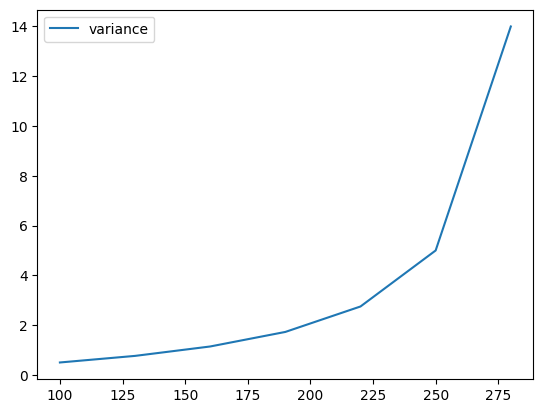

In [6]:
plt.plot(aux_v_n_greater, v_n_greater, label='variance')
plt.legend()
plt.show()

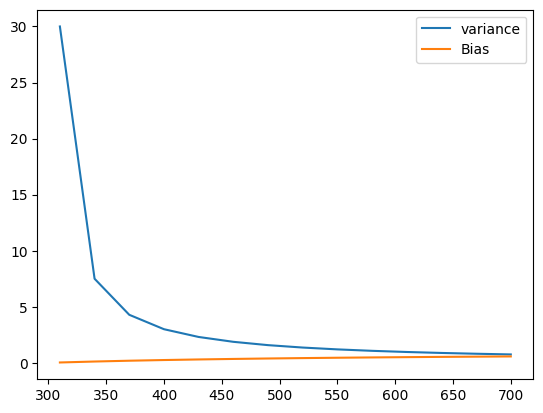

In [7]:
plt.plot(aux_v_n_smaller, v_n_smaller, label='variance')
plt.plot(aux_v_n_smaller, b, label='Bias')
plt.legend()
plt.show()

## Question 5
#### letter c)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

In [ ]:
rho1=0
rho2=0.5
rho3=0.95
y1 = np.empty(100)
y2 = np.empty(100)
y3 = np.empty(100)
B = np.zeros(100)
eps = np.random.normal(0, 1, 100)

y1[0] = 0
y2[0] = 0
y3[0] = 0
for t in range(1, 100):
    y1[t] = rho1 * y1[t-1] + eps[t]
    y2[t] = rho2 * y2[t-1] + eps[t]
    y3[t] = rho3 * y3[t-1] + eps[t]
x=np.arange(1, 101, 1, dtype=int)

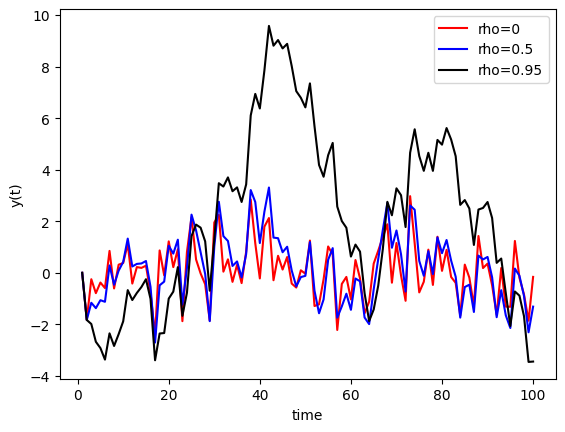

In [ ]:
plt.plot(x, y1, color ="red",label="rho=0")
plt.plot(x, y2, color ="blue",label="rho=0.5")
plt.plot(x, y3, color ="black",label="rho=0.95")
plt.legend()
plt.xlabel("time")
plt.ylabel("y(t)")
plt.show()

OLS estimations

In [ ]:
ols_y1 = sm.regression.linear_model.OLS(y1, x).fit()
ols_y1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.010
Method:                 Least Squares   F-statistic:                            0.02398
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                       0.877
Time:                        19:16:34   Log-Likelihood:                         -150.09
No. Observations:                 100   AIC:                                      302.2
Df Residuals:                      99   BIC:                                      304.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0003      0.002      0.155      0.877      -0.003       0.004
==============================================================================
Omnibus:                        0.728   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.518
Skew:                           0.175   Prob(JB):                        0.772
Kurtosis:                       3.033   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(f"The OLS estimator is: {ols_y1.params[0]}, and its t-stat is: {ols_y1.tvalues[0]}")

The OLS estimator is: 0.00029044696498583595, and its t-stat is: 0.15486618566987903


In [ ]:
ols_y2 = sm.regression.linear_model.OLS(y2, x).fit()
ols_y2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.2026
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                       0.654
Time:                        19:16:36   Log-Likelihood:                         -168.67
No. Observations:                 100   AIC:                                      339.3
Df Residuals:                      99   BIC:                                      342.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0010      0.002      0.450      0.654      -0.003       0.005
==============================================================================
Omnibus:                        0.882   Durbin-Watson:                   0.874
Prob(Omnibus):                  0.643   Jarque-Bera (JB):                0.996
Skew:                           0.186   Prob(JB):                        0.608
Kurtosis:                       2.684   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(f"The OLS estimator is: {ols_y2.params[0]}, and its t-stat is: {ols_y2.tvalues[0]}")

The OLS estimator is: 0.0010164325308129741, and its t-stat is: 0.45006572511200915


In [ ]:
ols_y3 = sm.regression.linear_model.OLS(y3, x).fit()
ols_y3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.296
Model:                            OLS   Adj. R-squared (uncentered):              0.289
Method:                 Least Squares   F-statistic:                              41.59
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                    4.15e-09
Time:                        19:16:37   Log-Likelihood:                         -260.79
No. Observations:                 100   AIC:                                      523.6
Df Residuals:                      99   BIC:                                      526.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0366      0.006      6.449      0.000       0.025       0.048
==============================================================================
Omnibus:                        2.641   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                2.595
Skew:                           0.384   Prob(JB):                        0.273
Kurtosis:                       2.815   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(f"The OLS estimator is: {ols_y3.params[0]}, and its t-stat is: {ols_y3.tvalues[0]}")

The OLS estimator is: 0.036587727074939916, and its t-stat is: 6.44894062073578


### Estimate Newey-West standard errors

In [ ]:
ols_y1_nw = sm.regression.linear_model.OLS(y1, x).fit(cov_type='HAC',cov_kwds={'maxlags':4})
ols_y1_nw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.010
Method:                 Least Squares   F-statistic:                            0.02169
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                       0.883
Time:                        19:16:39   Log-Likelihood:                         -150.09
No. Observations:                 100   AIC:                                      302.2
Df Residuals:                      99   BIC:                                      304.8
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0003      0.002      0.147      0.883      -0.004       0.004
==============================================================================
Omnibus:                        0.728   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.518
Skew:                           0.175   Prob(JB):                        0.772
Kurtosis:                       3.033   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

In [ ]:
ols_y2_nw = sm.regression.linear_model.OLS(y2, x).fit(cov_type='HAC',cov_kwds={'maxlags':4})
ols_y2_nw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                            0.08310
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                       0.774
Time:                        19:16:39   Log-Likelihood:                         -168.67
No. Observations:                 100   AIC:                                      339.3
Df Residuals:                      99   BIC:                                      342.0
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0010      0.004      0.288      0.773      -0.006       0.008
==============================================================================
Omnibus:                        0.882   Durbin-Watson:                   0.874
Prob(Omnibus):                  0.643   Jarque-Bera (JB):                0.996
Skew:                           0.186   Prob(JB):                        0.608
Kurtosis:                       2.684   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

In [ ]:
ols_y3_nw = sm.regression.linear_model.OLS(y3, x).fit(cov_type='HAC',cov_kwds={'maxlags':4})
ols_y3_nw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.296
Model:                            OLS   Adj. R-squared (uncentered):              0.289
Method:                 Least Squares   F-statistic:                              9.270
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                     0.00298
Time:                        19:16:40   Log-Likelihood:                         -260.79
No. Observations:                 100   AIC:                                      523.6
Df Residuals:                      99   BIC:                                      526.2
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0366      0.012      3.045      0.002       0.013       0.060
==============================================================================
Omnibus:                        2.641   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                2.595
Skew:                           0.384   Prob(JB):                        0.273
Kurtosis:                       2.815   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

In [ ]:
data = {'tstat': [ols_y1.tvalues[0], ols_y2.tvalues[0], ols_y3.tvalues[0]], 'tstat - NW': [ols_y1_nw.tvalues[0], ols_y2_nw.tvalues[0], ols_y3_nw.tvalues[0]]}
df = pd.DataFrame(data,index=["rho=0", "rho=0.5", "rho=0.95"])
df

,tstat,tstat - NW
rho=0,0.154866,0.147260
rho=0.5,0.450066,0.288278
rho=0.95,6.448941,3.044647
